In [86]:
import happybase
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt

In [54]:
connection = happybase.Connection('10.10.2.78')
sqlContext = SQLContext(sc)
table = connection.table('datos_EEUU')
datos = []
for key, data in table.scan():
    Nombre = data[b'Nombre:'].decode('utf-8')
    Apellido = data[b'Apellido:'].decode('utf-8')
    Renta = data[b'Renta:'].decode('utf-8')
    Edad = data[b'Edad:'].decode('utf-8')
    Estado_laboral = data[b'Estado_Laboral:'].decode('utf-8')
    datos.append([Nombre, Apellido, Renta, Edad, Estado_laboral])

In [87]:
df = sqlContext.createDataFrame(datos, ['Nombre', 'Apellido', 'Renta', 'Edad', 'Estado_laboral'])
edades = df.groupBy('Edad').count()

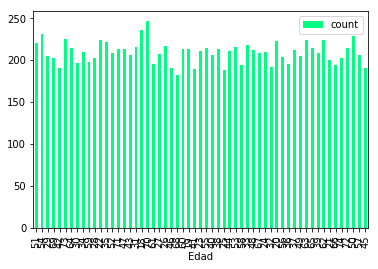

In [88]:
edades.toPandas().plot(kind='bar', x='Edad', y='count', colormap='winter_r')

In [94]:
df.createOrReplaceTempView('EEUU')
spark.sql('SELECT AVG(Renta) FROM EEUU').show()

+--------------------------+
|avg(CAST(Renta AS DOUBLE))|
+--------------------------+
|         2387.822214781954|
+--------------------------+

